In [1]:
#unos potrebnih modula

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

#unos podataka iz csv datoteke
train_df = pd.read_csv('nsl-kdd/KDDTrain+.txt')
test_df = pd.read_csv('nsl-kdd/KDDTest+.txt')

In [2]:
#prikazivanje strukture podataka unutar dataframea + prikaz broja redova i stupaca
#broj stupaca mora biti jednak da se mogu povezati u jedan dataframe

print(train_df, test_df)

        0  tcp  ftp_data   SF   491   0.1  0.2  0.3  0.4  0.5  ...  0.17  \
0       0  udp     other   SF   146     0    0    0    0    0  ...  0.00   
1       0  tcp   private   S0     0     0    0    0    0    0  ...  0.10   
2       0  tcp      http   SF   232  8153    0    0    0    0  ...  1.00   
3       0  tcp      http   SF   199   420    0    0    0    0  ...  1.00   
4       0  tcp   private  REJ     0     0    0    0    0    0  ...  0.07   
...    ..  ...       ...  ...   ...   ...  ...  ...  ...  ...  ...   ...   
125967  0  tcp   private   S0     0     0    0    0    0    0  ...  0.10   
125968  8  udp   private   SF   105   145    0    0    0    0  ...  0.96   
125969  0  tcp      smtp   SF  2231   384    0    0    0    0  ...  0.12   
125970  0  tcp    klogin   S0     0     0    0    0    0    0  ...  0.03   
125971  0  tcp  ftp_data   SF   151     0    0    0    0    0  ...  0.30   

        0.03  0.17.1  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0       0.60 

In [3]:
#podaci u izvornom .csv obliku nemaju nazive stupaca pa ih treba rucno dodati

columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [4]:
#unos imena stupaca u oba dataframea

train_df.columns = columns
test_df.columns = columns

In [5]:
#buduci da su dvije unesene datoteke vec podijeljene u train i test setove, model ce uvijek prediktirati identicno
#te se podatke moze povezati i kasnije dijeliti s train_test_split metodom da model moze mijenjati train i test podatke
#povezuje se concat metodom, a s ignore_index=True ce nastaviti niz indeksa vrijednosti
#u slucaju da se ne stavi, indeksi train seta ce ici od 0 do n-1 i unosom test seta ce ici opet od 0 do n-1

df = pd.concat([train_df, test_df], ignore_index=True)

print(df.head())
#df

   duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.10   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.07   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                   

In [6]:
#provjera da li ima "praznih" vrijednosti

df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
#prikaz nekih osnovnih parametara

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148515 entries, 0 to 148514
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148515 non-null  int64  
 1   protocol_type                148515 non-null  object 
 2   service                      148515 non-null  object 
 3   flag                         148515 non-null  object 
 4   src_bytes                    148515 non-null  int64  
 5   dst_bytes                    148515 non-null  int64  
 6   land                         148515 non-null  int64  
 7   wrong_fragment               148515 non-null  int64  
 8   urgent                       148515 non-null  int64  
 9   hot                          148515 non-null  int64  
 10  num_failed_logins            148515 non-null  int64  
 11  logged_in                    148515 non-null  int64  
 12  num_compromised              148515 non-null  int64  
 13 

In [8]:
#prikaz broja uzoraka svakog tipa napada u ciljnoj varijabli 'attack'

df['attack'].value_counts()

normal             77053
neptune            45870
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


Text(0, 0.5, 'Vrsta napada')

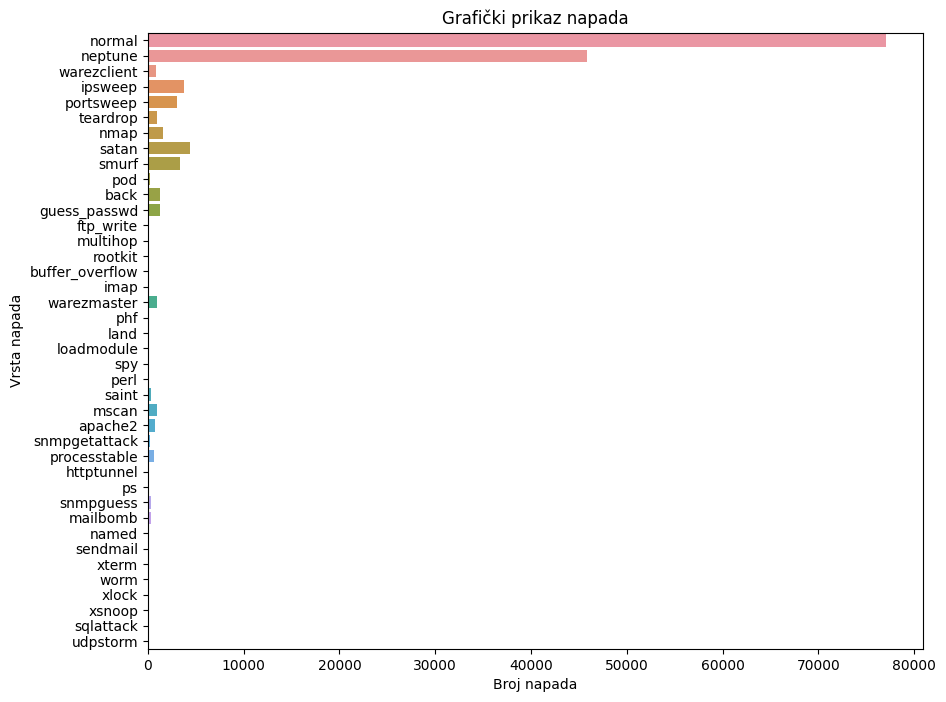

In [9]:
#seaborn knjizica je izgradjena na pyplot knjizici i njom se moze koristiti vec gotove grafove, samo se unesu vrijednost

plt.figure(figsize=(10, 8))
attack_dist = sns.countplot(data=df, y='attack')
plt.title('Grafički prikaz napada')
plt.xlabel('Broj napada')
plt.ylabel('Vrsta napada')

In [10]:
#protocol_type stupac je jedan od kandidata za graficki prikaz napada
#spajanjem podataka unutar crosstab objekta se moze jednostavno pripremiti za prikaz napada po protokolima

attacks_per_protocol = pd.crosstab(df.attack, df.protocol_type)
attacks_per_protocol

protocol_type,icmp,tcp,udp
attack,,,
apache2,0,737,0
back,0,1315,0
buffer_overflow,0,50,0
ftp_write,0,11,0
guess_passwd,0,1284,0
httptunnel,0,133,0
imap,0,12,0
ipsweep,3258,482,0
land,0,25,0


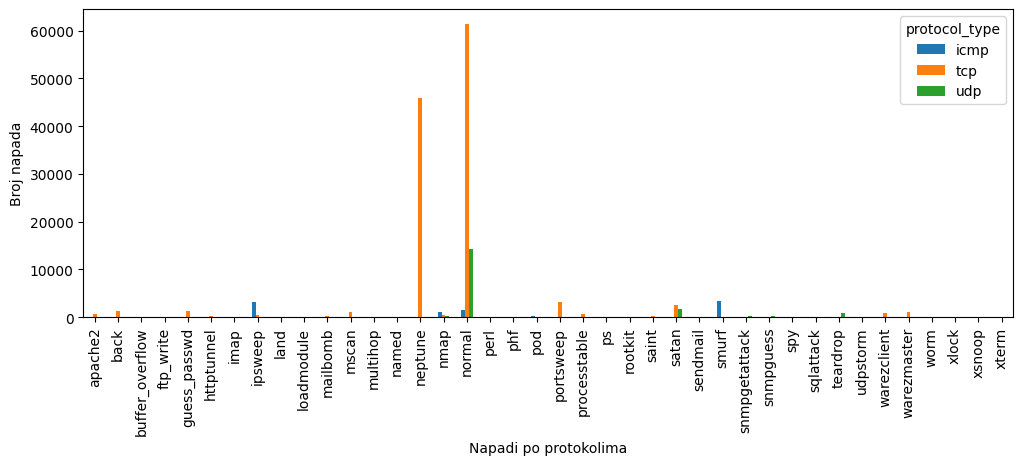

In [11]:
#graficki prikaz gore ispisanog crosstaba

app = attacks_per_protocol.plot(kind='bar', figsize=(12, 4), xlabel="Napadi po protokolima", ylabel="Broj napada")

In [12]:
df.service.value_counts()

http         48191
private      26626
domain_u      9937
smtp          8247
ftp_data      7710
             ...  
tftp_u           4
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

In [13]:
df.flag.value_counts()

SF        89819
S0        36864
REJ       15082
RSTR       3090
RSTO       2335
S1          386
SH          344
S3          298
S2          142
RSTOS0      105
OTH          50
Name: flag, dtype: int64

<AxesSubplot:xlabel='Flag', ylabel='Frekvencija'>

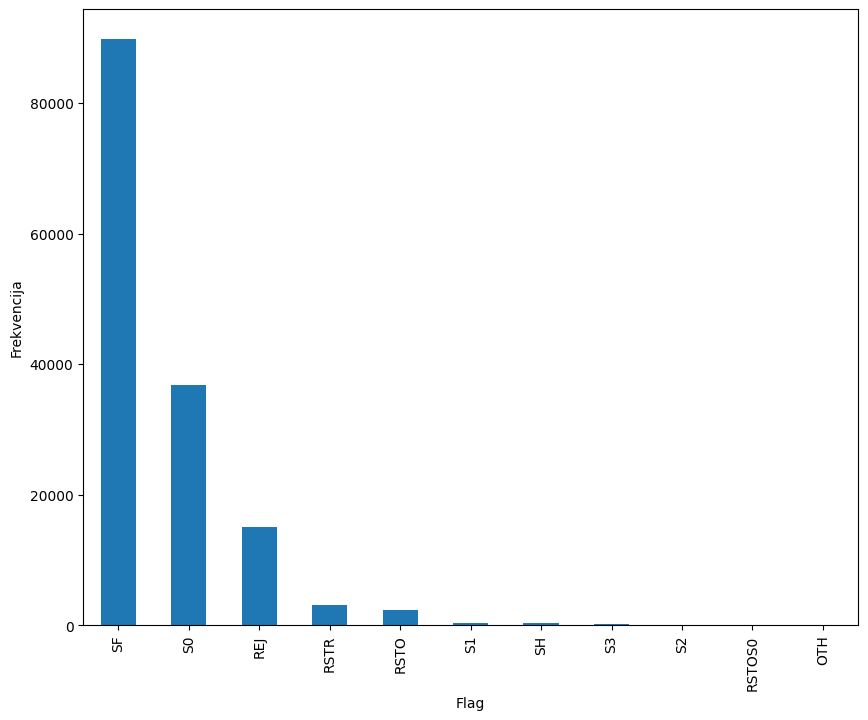

In [14]:
df.flag.value_counts().plot(figsize=(10, 8), kind='bar', ylabel='Frekvencija', xlabel='Flag')

In [15]:
#kopiranje 'attack' stupca

df['attack_classes'] = df.loc[:, 'attack'].values
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_classes
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
148511,0,tcp,http,SF,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
148512,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15,back
148513,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [16]:
#unutar novog stupca ce se grupirati napade prema dokumentaciji autora dataseta
#na prethodnom grafu napada vrijednosti nisu previse vidljive zbog ogromne razlike u frekvencijama

def attack_label(dataframe):
  dataframe.attack_classes.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'DoS', inplace=True)
  dataframe.attack_classes.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop', 'named', 'phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L', inplace=True)      
  dataframe.attack_classes.replace(['ipsweep','mscan', 'nmap','portsweep','saint', 'satan'],'probe', inplace=True)
  dataframe.attack_classes.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R', inplace=True)
    
attack_label(df)

In [17]:
#na identican nacin se izradjuje crosstab

attacks_per_protocol2 = pd.crosstab(df.attack_classes, df.protocol_type)
attacks_per_protocol2

protocol_type,icmp,tcp,udp
attack_classes,,,
DoS,3553,48927,906
R2L,4,3362,514
U2R,0,116,3
normal,1402,61441,14210
probe,4375,7721,1981


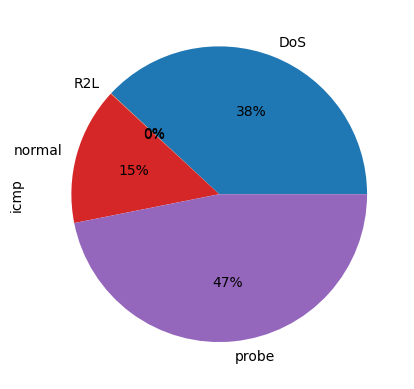

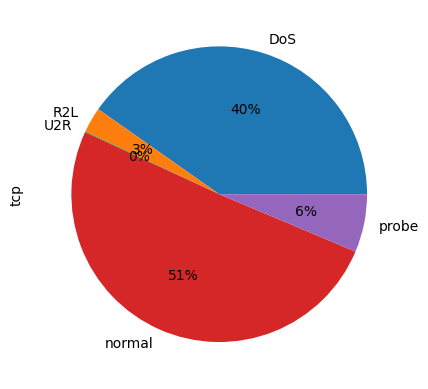

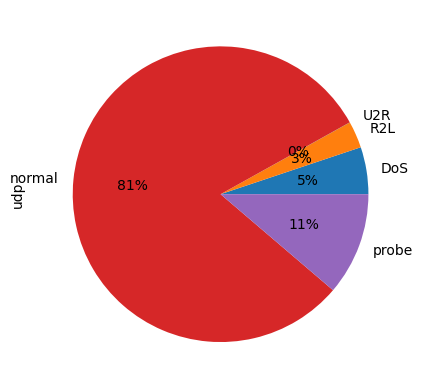

In [18]:
#grafički prikaz napada po individualnim protokolima
icmp_att = attacks_per_protocol2.icmp
tcp_att = attacks_per_protocol2.tcp
udp_att = attacks_per_protocol2.udp

#unos ^ u polje za prikaz 'pie' grafova kroz 'for' petlju
pies = [icmp_att, tcp_att, udp_att]

for p in pies:
    p.plot.pie(autopct='%.0f%%')
    plt.show()

In [19]:
#kraj analize

In [20]:
#izbacivanje napada koji nisu vise aktualni: 
#satan(zamijenjen s saint alatom),
#mscan (probing tool o kojem nema nikakvih podataka)
#named (nema podataka)

#izvrsava se trazenje zadanih napada kroz dataset i izbacuje ih se van
df = df[df.attack.str.contains("satan|mscan|named")==False].copy()

df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_classes
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DoS
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148509,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf,20,DoS
148510,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
148511,0,tcp,http,SF,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
148512,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15,DoS


In [21]:
#nakon izbacivanja gornjih podataka nastala je promjena u indeksima pa ih se treba resetirati
df.reset_index(drop=True, inplace=True)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_classes
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DoS
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143129,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf,20,DoS
143130,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
143131,0,tcp,http,SF,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
143132,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15,DoS


In [22]:
#početak modeliranja
#stupce čiji podaci nisu numeričkog tipa će se enkodirati pomocu label encoder objekta u vrijednosti 1 - n
#alternativni nacin je kodiranje vrijednosti pomoću dummies gdje bi se za svaku vrijednost napravio stupac s binarnom vrijednosti

from sklearn.preprocessing import LabelEncoder

to_encode = ['protocol_type', 'service', 'flag']

le = LabelEncoder()

df[to_encode] = df[to_encode].apply(LabelEncoder().fit_transform)
    
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_classes
0,0,2,40,9,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,1,44,5,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DoS
2,0,1,22,9,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,1,22,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,1,44,1,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143129,0,0,14,9,1032,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf,20,DoS
143130,0,1,49,9,794,333,0,0,0,0,...,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
143131,0,1,22,9,317,938,0,0,0,0,...,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21,normal
143132,0,1,22,9,54540,8314,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15,DoS


In [23]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df[columns[:40]] = ss.fit_transform(df[columns[:40]])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_classes
0,-0.11464,2.287301,0.790178,0.722250,-0.007548,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,3.470208,2.416905,-0.284755,-0.605893,-0.596157,-0.389395,0.00,normal,15,normal
1,-0.11464,-0.110515,1.062579,-0.770091,-0.007575,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,-0.102144,-0.467745,-0.284755,1.699707,1.708917,-0.389395,0.00,neptune,19,DoS
2,-0.11464,-0.110515,-0.435627,0.722250,-0.007532,-0.002538,-0.014954,-0.087092,-0.010597,-0.095790,...,-0.426904,-0.369405,0.076265,-0.536725,-0.573107,-0.389395,0.01,normal,21,normal
3,-0.11464,-0.110515,-0.435627,0.722250,-0.007538,-0.004588,-0.014954,-0.087092,-0.010597,-0.095790,...,-0.426904,-0.467745,-0.284755,-0.605893,-0.596157,-0.389395,0.00,normal,21,normal
4,-0.11464,-0.110515,1.062579,-2.262431,-0.007575,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,0.027759,-0.467745,-0.284755,-0.605893,-0.596157,2.832285,1.00,neptune,21,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143129,-0.11464,-2.508330,-0.980429,0.722250,-0.007387,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,-0.426904,2.810266,-0.284755,-0.605893,-0.596157,-0.389395,0.00,smurf,20,DoS
143130,-0.11464,-0.110515,1.403080,0.722250,-0.007430,-0.004611,-0.014954,-0.087092,-0.010597,-0.095790,...,-0.037193,-0.434965,-0.194500,-0.582837,-0.596157,-0.389395,0.00,normal,21,normal
143131,-0.11464,-0.110515,-0.435627,0.722250,-0.007517,-0.004450,-0.014954,-0.087092,-0.010597,-0.095790,...,-0.426904,-0.434965,-0.194500,-0.582837,-0.596157,-0.389395,0.00,normal,21,normal
143132,-0.11464,-0.110515,-0.435627,0.722250,0.002323,-0.002495,-0.014954,-0.087092,-0.010597,0.879684,...,-0.426904,-0.467745,-0.284755,-0.605893,-0.596157,-0.163877,0.07,back,15,DoS


In [24]:
#grupirani napadi vise ne trebaju pa ih se izbacuje
#izvorni stupac s napadim se pretvara u binarne vrijednosti 1-napad i 0-lazni napad

#kopiranje trenutnog df-a za viseklasnu predikciju
df2 = df.copy()

attack_flag = df.attack.map(lambda a: 0 if a == 'normal' else 1)
df['attack_flag'] = attack_flag
df.drop(['attack_classes', 'attack'], axis=1, inplace=True)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_flag
0,-0.11464,2.287301,0.790178,0.722250,-0.007548,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,-1.234575,3.470208,2.416905,-0.284755,-0.605893,-0.596157,-0.389395,0.00,15,0
1,-0.11464,-0.110515,1.062579,-0.770091,-0.007575,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,-1.010674,-0.102144,-0.467745,-0.284755,1.699707,1.708917,-0.389395,0.00,19,1
2,-0.11464,-0.110515,-0.435627,0.722250,-0.007532,-0.002538,-0.014954,-0.087092,-0.010597,-0.095790,...,1.004427,-0.426904,-0.369405,0.076265,-0.536725,-0.573107,-0.389395,0.01,21,0
3,-0.11464,-0.110515,-0.435627,0.722250,-0.007538,-0.004588,-0.014954,-0.087092,-0.010597,-0.095790,...,1.004427,-0.426904,-0.467745,-0.284755,-0.605893,-0.596157,-0.389395,0.00,21,0
4,-0.11464,-0.110515,1.062579,-2.262431,-0.007575,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,-1.077844,0.027759,-0.467745,-0.284755,-0.605893,-0.596157,2.832285,1.00,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143129,-0.11464,-2.508330,-0.980429,0.722250,-0.007387,-0.004699,-0.014954,-0.087092,-0.010597,-0.095790,...,1.004427,-0.426904,2.810266,-0.284755,-0.605893,-0.596157,-0.389395,0.00,20,1
143130,-0.11464,-0.110515,1.403080,0.722250,-0.007430,-0.004611,-0.014954,-0.087092,-0.010597,-0.095790,...,0.377507,-0.037193,-0.434965,-0.194500,-0.582837,-0.596157,-0.389395,0.00,21,0
143131,-0.11464,-0.110515,-0.435627,0.722250,-0.007517,-0.004450,-0.014954,-0.087092,-0.010597,-0.095790,...,1.004427,-0.426904,-0.434965,-0.194500,-0.582837,-0.596157,-0.389395,0.00,21,0
143132,-0.11464,-0.110515,-0.435627,0.722250,0.002323,-0.002495,-0.014954,-0.087092,-0.010597,0.879684,...,1.004427,-0.426904,-0.467745,-0.284755,-0.605893,-0.596157,-0.163877,0.07,15,1


In [25]:
#u polje to_drop ce se unijeti stupci s korelacijom manjom od 0.4 i -0.4 s 'attack' stupcem
#da bi se utjecalo i na stupce s negativnom korelacijom, unutar kopije dataframea ce se korelacije postaviti na apsolutnu vrijednost

to_drop = []

dfc = df.copy()
for x in dfc:
    if abs(dfc[x].corr(dfc['attack_flag'])) < 0.5:
        to_drop.append(x)

#prikaz rezultata for petlje

to_drop

df.drop(to_drop, axis=1, inplace=True)

In [26]:
for c in df:
    print(c, ": ", df[c].corr(df['attack_flag']))

flag :  -0.6374281056339409
logged_in :  -0.6568210008702907
num_outbound_cmds :  nan
count :  0.5387860125956017
serror_rate :  0.621900116394487
srv_serror_rate :  0.6224806610074821
same_srv_rate :  -0.7071794362248465
dst_host_srv_count :  -0.6834328342882657
dst_host_same_srv_rate :  -0.6557232947979804
dst_host_serror_rate :  0.6226960676117843
dst_host_srv_serror_rate :  0.6297733875799368
attack_flag :  1.0


In [27]:
#num_outbound_cmds prikazuje Not-a-Number vrijednost korelacije
#najjednostavnije bi bilo izbaciti van

df.drop('num_outbound_cmds', axis=1, inplace=True)

In [28]:
#podjela na trening-test setove u omjeru 70 na trening i 30 na test
#u X ide ciljna varijabla
#u Y ide sve ostalo

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [29]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

#poziv objekta algoritma
gnb = GaussianNB()

#treniranje podataka
gnb.fit(X_train, y_train)

#testiranje
gnb_predict=gnb.predict(X_test)

#prikaz preciznosti i izvjestaja
print(classification_report(y_test, gnb_predict))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88     23231
           1       0.93      0.77      0.84     19710

    accuracy                           0.86     42941
   macro avg       0.88      0.86      0.86     42941
weighted avg       0.87      0.86      0.86     42941



In [30]:
#dtc
#isti postupak ide i za iduce algoritme

dtc = DecisionTreeClassifier(random_state=0, max_depth=50)
dtc.fit(X_train, y_train)
dtc_predict=dtc.predict(X_test)
print(classification_report(y_test, dtc_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     23231
           1       0.95      0.94      0.94     19710

    accuracy                           0.95     42941
   macro avg       0.95      0.95      0.95     42941
weighted avg       0.95      0.95      0.95     42941



In [31]:
#knn
#racunanje k-vrijednosti prema nacelu k=sqrt(n)

n=int(math.sqrt(len(X_train)))

knn = KNeighborsClassifier(n_neighbors=n)

knn.fit(X_train, y_train)
knn_predict=knn.predict(X_test)
print(classification_report(y_test, knn_predict))

/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.93      0.96      0.94     23231
           1       0.95      0.91      0.93     19710

    accuracy                           0.94     42941
   macro avg       0.94      0.93      0.94     42941
weighted avg       0.94      0.94      0.94     42941



In [32]:
#prikaz preciznosti u obliku konfuzijske matrice uz pomoc seaborna

predictions = [ gnb_predict, dtc_predict, knn_predict ]

def conf_matrix(pred, color):
    conf_matrix=confusion_matrix(y_test, pred)
    sns.heatmap(conf_matrix, annot=True, cmap=color, fmt="d")

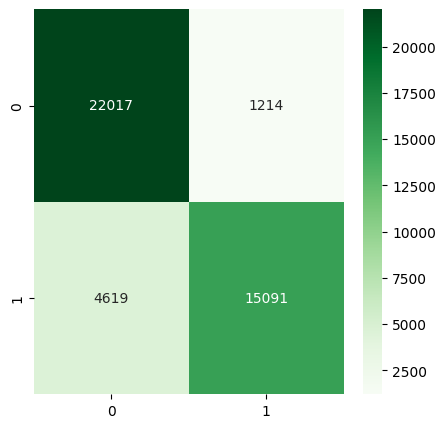

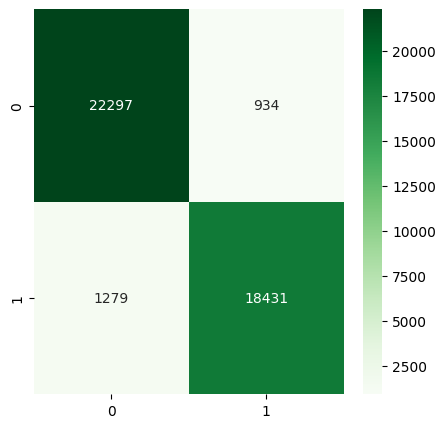

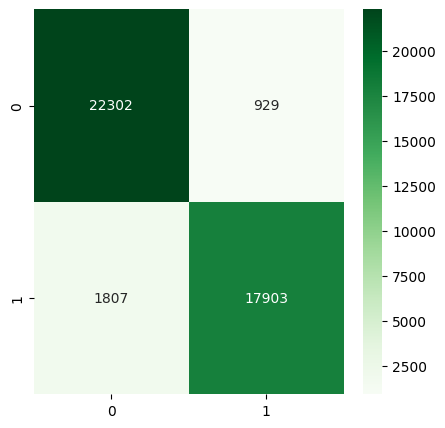

In [33]:
for p in predictions:
    plt.figure(figsize=(5, 5))
    conf_matrix(p, 'Greens')

In [34]:
#kraj prvog modela

In [35]:
#viseklasno

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143134 entries, 0 to 143133
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     143134 non-null  float64
 1   protocol_type                143134 non-null  float64
 2   service                      143134 non-null  float64
 3   flag                         143134 non-null  float64
 4   src_bytes                    143134 non-null  float64
 5   dst_bytes                    143134 non-null  float64
 6   land                         143134 non-null  float64
 7   wrong_fragment               143134 non-null  float64
 8   urgent                       143134 non-null  float64
 9   hot                          143134 non-null  float64
 10  num_failed_logins            143134 non-null  float64
 11  logged_in                    143134 non-null  float64
 12  num_compromised              143134 non-null  float64
 13 

In [37]:
df2 = df2.drop(df2.columns[4:22], axis = 1)
df2 = df2.drop(['duration', 'level', 'attack'], axis=1)

In [38]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
df2['attack_classes'].value_counts()

normal    77053
DoS       53386
probe      8713
R2L        3863
U2R         119
Name: attack_classes, dtype: int64

In [40]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

In [50]:
print(y_train.value_counts(), "\n\n", y_train_resampled.value_counts())

normal    61538
DoS       42824
probe      6976
R2L        3076
U2R          93
Name: attack_classes, dtype: int64 

 normal    61538
DoS       61538
probe     61538
R2L       61538
U2R       61538
Name: attack_classes, dtype: int64


In [51]:
gnb.fit(X_train_resampled, y_train_resampled)
gnb_predict=gnb.predict(X_test)
print(classification_report(y_test, gnb_predict))

              precision    recall  f1-score   support

         DoS       0.97      0.89      0.93     10562
         R2L       0.02      0.11      0.03       787
         U2R       0.01      0.92      0.01        26
      normal       0.91      0.42      0.57     15515
       probe       0.53      0.86      0.66      1737

    accuracy                           0.61     28627
   macro avg       0.49      0.64      0.44     28627
weighted avg       0.89      0.61      0.69     28627



In [52]:
dtc.fit(X_train_resampled, y_train_resampled)
dtc_predict=dtc.predict(X_test)
print(classification_report(y_test, dtc_predict))

              precision    recall  f1-score   support

         DoS       0.99      1.00      1.00     10562
         R2L       0.85      0.93      0.88       787
         U2R       0.19      0.35      0.24        26
      normal       0.99      0.99      0.99     15515
       probe       0.99      0.99      0.99      1737

    accuracy                           0.99     28627
   macro avg       0.80      0.85      0.82     28627
weighted avg       0.99      0.99      0.99     28627



In [53]:
n=int(math.sqrt(len(X_train_resampled)))

knn.fit(X_train_resampled, y_train_resampled)
knn_predict=knn.predict(X_test)
print(classification_report(y_test, knn_predict))

/home/alen-wsl/anaconda3/envs/dsenv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

         DoS       0.98      0.97      0.98     10562
         R2L       0.43      0.93      0.59       787
         U2R       0.03      0.92      0.06        26
      normal       0.99      0.88      0.93     15515
       probe       0.90      0.98      0.94      1737

    accuracy                           0.92     28627
   macro avg       0.67      0.94      0.70     28627
weighted avg       0.97      0.92      0.94     28627



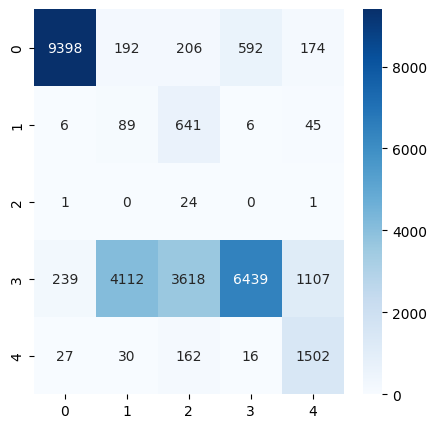

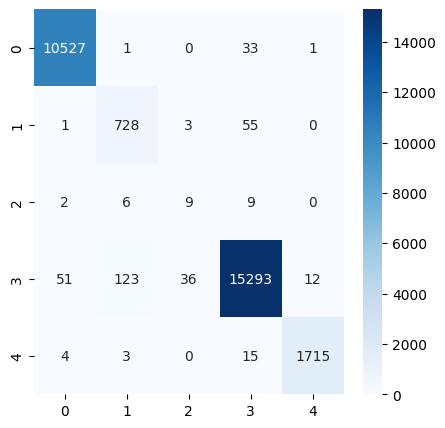

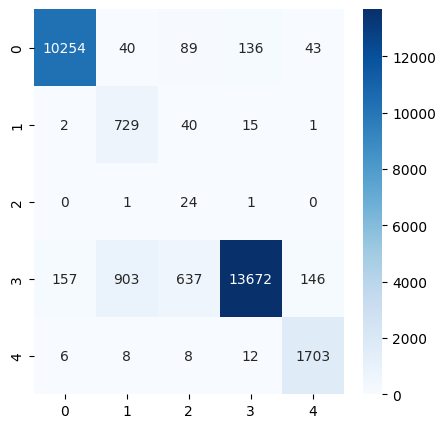

In [56]:
predictions = [ gnb_predict, dtc_predict, knn_predict ]

for p in predictions:
    plt.figure(figsize=(5, 5))
    conf_matrix(p, 'Blues')